# Reste à faire K-KMeans

In [2]:
from utils.utils import *
from utils.GraphCreation import *

In [3]:
import numpy as np
from sklearn.cluster import SpectralClustering
from tslearn.clustering import KernelKMeans
from sklearn.cluster import KMeans
import utils.kernel_kmeans as kernel_kmeans

/Users/Meilame/opt/anaconda3/lib/python3.8/site-packages/tslearn/clustering/kmeans.py:20: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


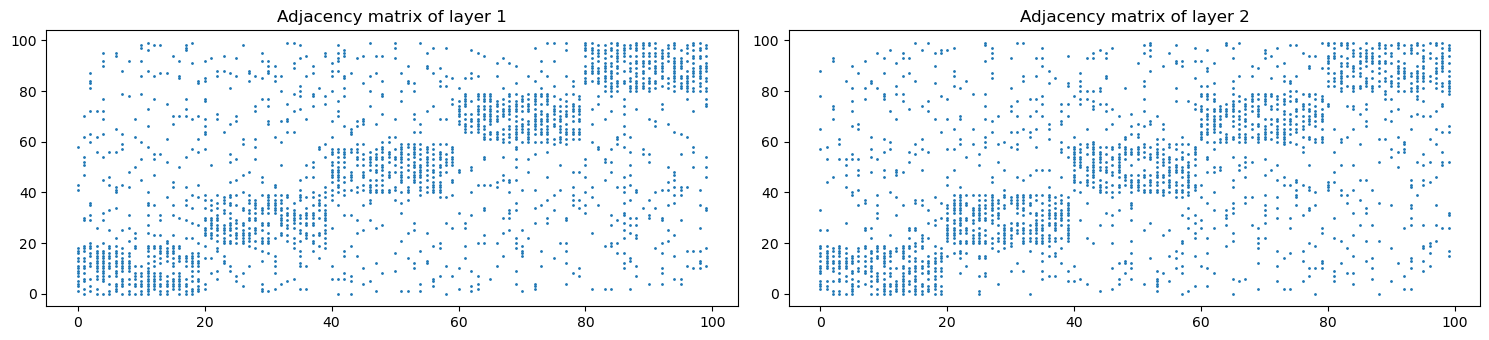

In [4]:
n = 100
M = 2
k = 5

prob = np.full((k,M),0.6)
prob_prime = np.full((k,k,M),0.1)
clusters_size = k*[20]

matrix,index_cluster = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = True)

## K-KMeans

In [47]:
def K_KMeans(adj_matrix, d, k):
    """
    Kernel KMeans applied on the summation of spectral kernels of the adjacency matrices
    See Eq 17 of the paper

    Parameters
    ----------
    adj_matrix : numpy array of shape (M,n,n)
    d (int): number of eigenvectors to use
    k (int): number of target clusters

    Returns
    -------
    numpy array of shape (n,k) : cluster assignment matrix
    """
    n, _, M = adj_matrix.shape

    W = np.zeros((n,n))
    for i in range(M):
        W_i = adj_matrix[:,:, i]
        D_i = computeDegreeMatrix(W_i)
        Lsym_i = (np.sqrt(np.linalg.inv(D_i))) @ (D_i - W_i) @ (np.sqrt(np.linalg.inv(D_i)))
        eigenvalues, eigenvectors = np.linalg.eig(Lsym_i)
        sorted_eigvecs = eigenvectors[:,np.argsort(eigenvalues)[:d]] #shape (n,d)

        K_i = np.zeros((n,n))
        for j in range(d):
            K_i += sorted_eigvecs[:,j] @ sorted_eigvecs[:,j].T
        
        W += K_i
    return SpectralClustering(n_clusters=k, affinity='precomputed').fit(W).labels_
    



In [49]:
K_KMeans(matrix, n//2, 5)

array([2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 4, 3, 0, 3, 2, 0, 0,
       0, 0, 4, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 3, 3, 0, 0, 2,
       3, 2, 0, 0, 0, 2, 3, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 4], dtype=int32)